In [1]:
import torch
import numpy as np


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append('src')
import os
os.getcwd()

'c:\\Users\\user\\modernopt'

In [81]:
x = torch.tensor(np.linspace(-10, 10, 1000))
x0= torch.tensor([1, 5, -9, -1, 9])
ws = torch.tensor([0.5, 1, 0.5, 2, 0.25])
amp = torch.tensor([1, 4, 6, 9, 0.8])
gau = torch.tensor([0.5, .5, 1, 0, 0.25])


In [82]:
positions = torch.stack([amp, ws, x0, gau]).view(-1).repeat(18, 1)



In [145]:
import importlib
import src.miscellaneous as misc
import src.fish_algo as fish_algo

importlib.reload(misc)
importlib.reload(fish_algo)

from src.matrix import Matrix
from src.spectrum import Spectrum

import matplotlib.pyplot as plt
data = misc.voigt_(x, amp, ws, x0, gau, True)
# plt.plot(data.tolist())

spc = Spectrum(
    x, data
)
dec = fish_algo.Deconvolutor(spc, 100, {'amp': (0, 10),
     'w': (0, 10),
     'x0': sorted(spc.wavenums[[0, -1]]),
     'gau': (0, 1)
    }, 'neg_log', {'step_vol': 0.9, 'step_ind': 1.5})


In [146]:
dec.run(100)

Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

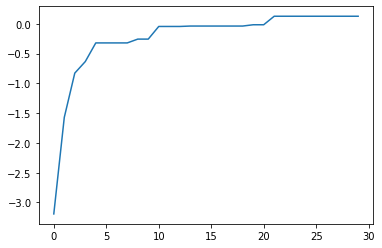

In [147]:
plt.plot(dec.school.history)

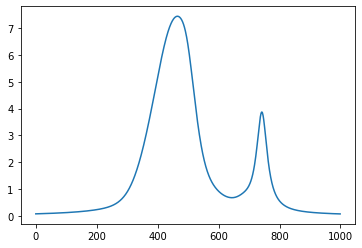

In [148]:
plt.plot(misc.voigt_(dec.x, *dec.school.optimal_position.view(4, -1)))

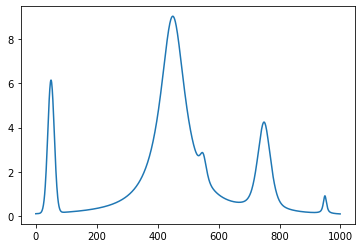

In [65]:
plt.plot(data)